In [1]:
import cf_xarray
import gribberish
import xarray as xr

In [2]:
ds = xr.open_dataset('/Users/matthewiannucci/Downloads/hrrr.t12z.wrfsubhf13.grib2', engine='gribberish')
ds

<xarray.Dataset>
Dimensions:               (time_1: 4, hag_0: 2, y: 1059, x: 1799, time: 4,
                           hag_1: 2, time_2: 4)
Coordinates:
  * time                  (time) datetime64[ns] 2023-01-12 ... 2023-01-12T00:...
  * time_1                (time_1) datetime64[ns] 2023-01-12T00:15:00 ... 202...
  * time_2                (time_2) datetime64[ns] 2023-01-12T00:10:00 ... 202...
  * hag_0                 (hag_0) float64 10.0 80.0
  * hag_1                 (hag_1) float64 1e+03 4e+03
    latitude              (y, x) float64 ...
    longitude             (y, x) float64 ...
Dimensions without coordinates: y, x
Data variables: (12/27)
    vgrd_VGRDhag_fcst     (time_1, hag_0, y, x) float64 ...
    spfh                  (time_1, y, x) float64 ...
    hgt_HGTsfc_fcst       (time_1, y, x) float64 ...
    prate                 (time_1, y, x) float64 ...
    refc                  (time_1, y, x) float64 ...
    hgt_HGTclt_fcst       (time_1, y, x) float64 ...
    ...                    ...
    retop                 (time_1, y, x) float64 ...
    hgt_HGT_fcst          (time_1, y, x) float64 ...
    ugrd_UGRDhag_avgfcst  (time_2, y, x) float64 ...
    ugrd_UGRDhag_fcst     (time_1, hag_0, y, x) float64 ...
    vgrd_VGRDhag_avgfcst  (time_2, y, x) float64 ...
    vis                   (time_1, y, x) float64 ...
Attributes:
    meta:     Generated with gribberishpy

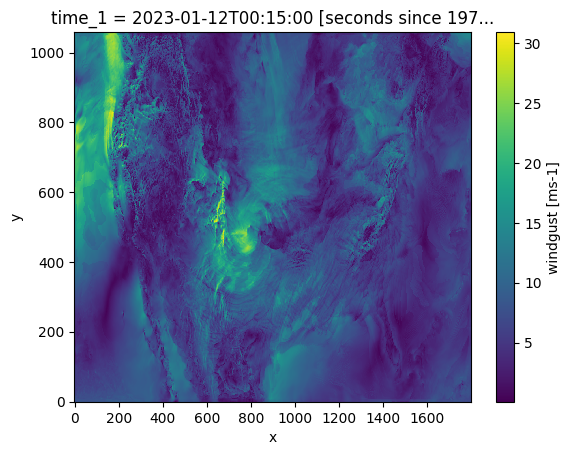

In [3]:
ds.gust.cf.isel(time=0).plot()